Proyecto FINANZAS (Python)
==========================


  Objetivo recuperar los valores de las acciones del mercado americano (inicialmente estoy
haciendolo para el español) y analizar para detectar acciones que van a subir o bajar.

    - Recuperar todas las acciones de un país  (HECHO)    he empezado con españa.
    - Recuperar los datos de cada acción para su análisis  (HECHO)  hay acciones que no encuentra

    - Análisis por 3 modelos: RBF, Lineal y Polinomial realizado (ipynb "Linear Model")


   Funcionalidades en curso
   ------------------------

    - Grabar dataframe en CSV, para ello incorporar columna Activo (ticker) y unir los dataframes
    de todos los activos.

    - Analizar manualmente tickers (ejemplo: BBVA, SP500, buscar ETF500) para diseñar modelo de 
    análisis, avisos si se detectan tendencias, etc. 

In [8]:
import investpy as inv
from pandas_datareader import data
import datetime as dt
from tqdm import tqdm       # librería para crear BARRA DE PROGRESO

  Función que devuelve la lista de activos de un pais

Parámetros:
  - productos:    'stocks', 'funds' or 'etfs'
  - pais:         spain, United States

In [2]:
#    Función que devuelve la lista de activos de un pais
#  Parámetros:
#   - productos:    'stocks', 'funds' or 'etfs'
#   - pais:         spain, United States
def ListaActivos(producto, pais):
    if producto == 'stocks':
        lista = inv.get_stocks_list(country=pais)
    elif producto == 'funds':
        lista = inv.get_funds_list(country=pais)
    elif producto == 'etfs':
        lista = inv.get_etfs_list(country=pais)
    return lista

  Vamos a recuperar todos las acciones del mercado Español

In [9]:
prod = 'stocks'
pais = 'spain'
ListaAcciones = ListaActivos(prod, pais)
print(ListaAcciones)
print("Acciones de España: ", len(ListaAcciones))

['ACS', 'ABG', 'A3M', 'ACX', 'BBVA', 'BKT', 'BME', 'ANA', 'CABK', 'ENAG', 'FCC', 'NTGY', 'SGREN', 'GRLS', 'FER', 'REE', 'ITX', 'REP', 'IBE', 'IDR', 'MAP', 'TEF', 'TL5', 'SCYR', 'SABE', 'SAN', 'COL', 'TRE', 'OHL', 'ICAG', 'EBRO', 'ELE', 'AMA', 'BKIA', 'DIDA', 'VTSG', 'ROVI', 'GALQ', 'SLRS', 'AI', 'ALNTA', 'ALB', 'PRS', 'MEL', 'GSJ', 'NXTE', 'ADXR', 'MCM', 'GCO', 'SPSL', 'ENC', 'CAF', 'UBS', 'ISUR', 'QBT', 'LGT', 'IBG', 'BRIO', 'ADZ', 'RLIA', 'IBES', 'CBAV', 'RDM', 'NEA', 'CIEA', 'RTA4', 'RJFE', 'EZEN', 'MDF', 'ZOT', 'BDL', 'MTBA', 'MVC', 'NHH', 'FAE', 'TUR', 'PVA', 'GRLSbn', 'BIOS', 'VIS', 'PSG', 'ALM', 'VOC', 'VID', 'CCMC', 'TUBA', 'REN', 'FLUI', 'ENOR', 'AZK', 'APAM', 'SNCE', 'ECR', 'CDRE', 'NATR', 'APE', 'AIR', 'PRIM', 'OLEO', 'MTS', 'ABGek', 'LBK', 'EBI', 'YENT', 'PETR4', 'AMXL', 'BRPO', 'BRPP', 'BRKM3', 'CPLE6', 'ELTO', 'ELTB', 'PETR3', 'USIO', 'USIM5', 'VALO', 'ALFAA', 'ELEKTRA', 'XNOR', 'TVAZ', 'BBAR', 'CMIG4', 'BBDC', 'GGBR4', 'VOLB', 'IKM', 'ABBO', 'ALC', 'ADLB', 'CATN', 'EESP'

   Función que devuelve diccionario con todos los activos (simbolos) del producto y pais con información en dataframe de históricos diarios con la informacion solicitada

Parámetros:
 - productos: 'stocks', 'funds' or 'etfs'
 - pais:  spain, United States
 - fecInicio y fecFin:  fechas desde hasta de la información a obtener. Formato 'yyyy-mm-dd'

In [3]:
#    Función que devuelve diccionario con todos los activos (simbolos) del producto y pais  
# con información en dataframe de históricos diarios con la informacion solicitada
#  Parámetros:
#   - productos: 'stocks', 'funds' or 'etfs'
#   - pais:  spain, United States
#   - fecInicio y fecFin:  fechas desde hasta de la información a obtener. Formato 'yyyy-mm-dd'
def ObtenerHist(fecInicio, fecFin, producto, pais):
    data_res = dict()
    error_list = list()
    data_list = ListaActivos(producto, pais)    # recuperamos la lista de activos
    for activo in tqdm(data_list):
        try:
            df_hist = data.DataReader(activo + '.MC', "yahoo", fecInicio, fecFin)
        except:
            error_list.append(activo)
        else:
            if df_hist.isnull().values.any() == False:
                data_res[activo] = df_hist
    print("lista errores: ", error_list)
    return data_res

  Vamos a recuperar todos los datos de todas las acciones de España, 234.
Algunas dan error...

In [7]:
fDesde = "2022-01-01"
fHasta = dt.date.today()
dicActivos = ObtenerHist(fDesde, fHasta, prod, pais)
print(dicActivos['BBVA'])

100%|██████████| 234/234 [03:56<00:00,  1.01s/it]

lista errores:  ['BME', 'ENAG', 'SGREN', 'GRLS', 'REE', 'SABE', 'OHL', 'ICAG', 'AMA', 'BKIA', 'DIDA', 'VTSG', 'SLRS', 'ALNTA', 'NXTE', 'ADXR', 'SPSL', 'QBT', 'BRIO', 'IBES', 'RDM', 'CIEA', 'RTA4', 'RJFE', 'EZEN', 'ZOT', 'BDL', 'MTBA', 'TUR', 'GRLSbn', 'BIOS', 'CCMC', 'TUBA', 'FLUI', 'ENOR', 'SNCE', 'CDRE', 'NATR', 'APE', 'PRIM', 'OLEO', 'ABGek', 'LBK', 'EBI', 'PETR4', 'AMXL', 'BRPO', 'BRPP', 'BRKM3', 'CPLE6', 'ELTO', 'ELTB', 'PETR3', 'USIO', 'USIM5', 'VALO', 'ALFAA', 'ELEKTRA', 'TVAZ', 'BBAR', 'CMIG4', 'BBDC', 'GGBR4', 'VOLB', 'IKM', 'ABBO', 'ADLB', 'CATN', 'EESP', 'EUWT', 'GRIE', 'MASM', 'IMGI', 'MEDC', 'NEUB', 'SECU', 'EDRE', 'LRES', 'CRBHO', 'HMR', 'NBIB', 'EKTL', 'GREG', 'YARE', 'YOSO', 'PHMR', 'GIGAH', 'NEOL', 'TQT', 'CLRE', 'DOMI', 'PQR', 'YSCI', 'YAST', 'VOZ', 'ECG', 'MONIB', 'PANGO', 'CASHP', 'ELZZ', 'BAINS', 'YDOM', 'YPSNA', 'YHAB', 'YTOR', 'YGOB', 'EATP', 'SPK', 'YAC1', 'YEPS', 'PROE', 'IFFE']
              High     Low    Open   Close      Volume  Adj Close
Date             

Análisis de valores usando las medias móviles 
---

  Probando medias móviles de: 5, 20, 50 días.


Sacado de https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/


In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.formula.api as smf


#  Seleccionamos los activos: Apple, Microsoft y indice S&P500.
tickers = ['AAPL', 'MSFT', '^GSPC']
start_date = '2022-01-01'
end_date = dt.date.today()

panel_data = data.DataReader(tickers, "yahoo", start_date, end_date)

close = panel_data['Close']     # Nos quedamos con los precios de cierre

#    Seleccionamos los datos de Microsoft, devuelve un pandas series indexado por fecha
activo = 'AAPL'
analisis = close.loc[:, activo]

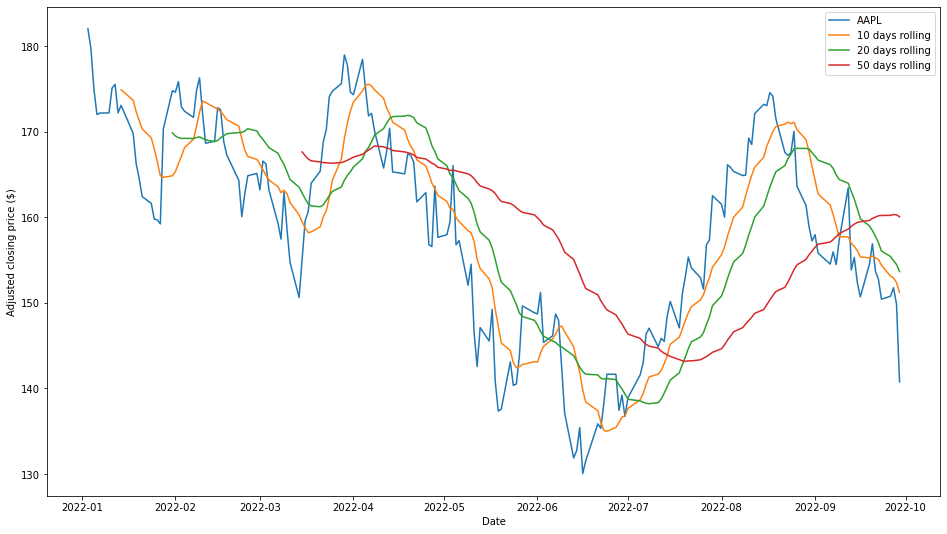

In [3]:
#  Calculamos medias de 10, 20 y 50 días
s_rolling = analisis.rolling(window=10).mean()
short_rolling = analisis.rolling(window=20).mean()
long_rolling = analisis.rolling(window=50).mean()

#  Representamos el activo y sus medias 10, 20 y 50 días
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(analisis.index, analisis, label=activo)
ax.plot(s_rolling.index, s_rolling, label='10 days rolling')
ax.plot(short_rolling.index, short_rolling, label='20 days rolling')
ax.plot(long_rolling.index, long_rolling, label='50 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
plt.show()

Probamos a utilizar el modelo de Regresión Lineal

In [12]:
import numpy as np

#  Definimos las variables para el modelo
x = analisis.values
y = analisis.index

x = np.reshape(x, (len(x), 1))   # Convertimos una fila en una collumna (1 dimensión)
y = np.reshape(y, (len(y), 1))
    
print(y.head())

AttributeError: 'DatetimeIndex' object has no attribute 'head'

In [10]:
from sklearn.linear_model import LinearRegression

#  Modelamos con Regresión Lineal
print("\nModelo de Regresión Lineal")
lrm = LinearRegression().fit(x, y)
print("  *** Entrenamiento ***")
R2 = lrm.score(x,y)
print(f"b0= {lrm.intercept_:.5}")
print(f"bi= {lrm.coef_}")
print(f"R2 Entrenamiento: {R2:.3}")


Modelo de Regresión Lineal


ValueError: Expected 2D array, got 1D array instead:
array=[182.00999451 179.69999695 174.91999817 172.         172.16999817
 172.19000244 175.08000183 175.52999878 172.19000244 173.07000732
 169.80000305 166.22999573 164.50999451 162.41000366 161.61999512
 159.77999878 159.69000244 159.22000122 170.33000183 174.77999878
 174.61000061 175.83999634 172.8999939  172.38999939 171.66000366
 174.83000183 176.27999878 172.11999512 168.63999939 168.88000488
 172.78999329 172.55000305 168.88000488 167.30000305 164.32000732
 160.07000732 162.74000549 164.8500061  165.11999512 163.19999695
 166.55999756 166.22999573 163.16999817 159.30000305 157.44000244
 162.94999695 158.52000427 154.72999573 150.61999512 155.08999634
 159.58999634 160.61999512 163.97999573 165.38000488 168.82000732
 170.21000671 174.07000732 174.72000122 175.6000061  178.96000671
 177.77000427 174.61000061 174.30999756 178.44000244 175.05999756
 171.83000183 172.13999939 170.08999634 165.75       167.66000366
 170.3999939  165.28999329 165.07000732 167.3999939  167.22999573
 166.41999817 161.78999329 162.88000488 156.80000305 156.57000732
 163.63999939 157.6499939  157.96000671 159.47999573 166.02000427
 156.77000427 157.27999878 152.05999756 154.50999451 146.5
 142.55999756 147.11000061 145.53999329 149.24000549 140.82000732
 137.3500061  137.58999634 143.11000061 140.36000061 140.52000427
 143.77999878 149.63999939 148.83999634 148.71000671 151.21000671
 145.38000488 146.13999939 148.71000671 147.96000671 142.63999939
 137.13000488 131.88000488 132.75999451 135.42999268 130.05999756
 131.55999756 135.86999512 135.3500061  138.27000427 141.66000366
 141.66000366 137.44000244 139.22999573 136.72000122 138.92999268
 141.55999756 142.91999817 146.3500061  147.03999329 144.86999512
 145.86000061 145.49000549 148.47000122 150.16999817 147.07000732
 151.         153.03999329 155.3500061  154.08999634 152.94999695
 151.6000061  156.78999329 157.3500061  162.50999451 161.50999451
 160.00999451 166.13000488 165.80999756 165.3500061  164.86999512
 164.91999817 169.24000549 168.49000549 172.1000061  173.19000244
 173.02999878 174.55000305 174.1499939  171.52000427 167.57000732
 167.22999573 167.52999878 170.02999878 163.61999512 161.38000488
 158.91000366 157.22000122 157.96000671 155.80999756 154.52999878
 155.96000671 154.46000671 157.36999512 163.42999268 153.83999634
 155.30999756 152.36999512 150.69999695 154.47999573 156.8999939
 153.72000122 152.74000549 150.42999268 150.77000427 151.75999451
 149.83999634 140.76499939].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
rls = smf.ols(formula="y~x", data=df).fit()
parametros = rlsEntrenado.params
print(parametros)
print(f"Ecuación Y = {parametros.Intercept:.4} {parametros.x:.3} * x")

xn = sm.add_constant(analisis.index)         # añadimos columna constante
modeloAnova = sm.OLS(analisis, xn).fit()
print("\nTabla ANOVA")
print(modeloAnova.summary())